In [36]:
import pandas as pd
import numpy as np
import nltk
import spacy
import re
from datetime import date, datetime
import time

In [3]:
import warnings
warnings.filterwarnings('once')

In [96]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [4]:
from tqdm import tqdm

In [258]:
tqdm.pandas()

In [6]:
pd.set_option('display.max_colwidth', -1)

In [58]:
pd.options.mode.chained_assignment = None

In [265]:
df = pd.read_csv('~/twitter_juul/input/userTimelineData.csv',lineterminator='\n', index_col=None)

In [266]:
df

,favourites_count,friendList,friendsCount,hashtags,imageurl,lang,retweetCount,retweeted,tweetCreatedAt,tweetId,tweetText,userCreatedAt,userDescription,userFollowersCount,userID,userLocation,userName
0,51,None,385,None,http://pbs.twimg.com/profile_images/741806698260779008/Gpt4pGvP_normal.jpg,en,1,False,2016-06-12 01:38:44,741806913189511168,Cake cake cake cake,2016-05-29 17:29:59,the cat's pa jams n words n suchh.,19,736972871671644160,"Virginia, USA",Mood
1,51,None,385,None,http://pbs.twimg.com/profile_images/741806698260779008/Gpt4pGvP_normal.jpg,tl,0,False,2016-06-12 01:36:48,741806424754425856,@SSEEEGE hahahahhahahaha,2016-05-29 17:29:59,the cat's pa jams n words n suchh.,19,736972871671644160,"Virginia, USA",Mood
2,51,None,385,None,http://pbs.twimg.com/profile_images/741806698260779008/Gpt4pGvP_normal.jpg,en,0,False,2016-06-04 05:04:41,738959635839897600,Talk back to your ideas your to back talk,2016-05-29 17:29:59,the cat's pa jams n words n suchh.,19,736972871671644160,"Virginia, USA",Mood
3,51,None,385,None,http://pbs.twimg.com/profile_images/741806698260779008/Gpt4pGvP_normal.jpg,en,0,False,2016-06-04 05:04:16,738959532051857408,YOU WILL ALWAYS REMEMBER THIS AS THE DAY U ALMOST CAUGHT CAPTAIN JACK SPARROW,2016-05-29 17:29:59,the cat's pa jams n words n suchh.,19,736972871671644160,"Virginia, USA",Mood
4,51,None,385,['juul'],http://pbs.twimg.com/profile_images/741806698260779008/Gpt4pGvP_normal.jpg,en,1,False,2016-06-02 18:00:59,738430225848078336,@Anubis754 crown #juul,2016-05-29 17:29:59,the cat's pa jams n words n suchh.,19,736972871671644160,"Virginia, USA",Mood
5,51,None,385,NaN,http://pbs.twimg.com/profile_images/741806698260779008/Gpt4pGvP_normal.jpg,en,2,False,2016-06-01 19:11:01,738085461969756160,@levelsbeats this is fresh as anything. Well done,2016-05-29 17:29:59,the cat's pa jams n words n suchh.,19,736972871671644160,"Virginia, USA",Mood
6,51,None,385,NaN,http://pbs.twimg.com/profile_images/741806698260779008/Gpt4pGvP_normal.jpg,en,1,False,2016-06-01 19:10:55,738085437315637250,Loyalty is the name,2016-05-29 17:29:59,the cat's pa jams n words n suchh.,19,736972871671644160,"Virginia, USA",Mood
7,51,None,385,NaN,http://pbs.twimg.com/profile_images/741806698260779008/Gpt4pGvP_normal.jpg,en,1,False,2016-06-01 19:10:52,738085422912425985,Alright. If you're jumping outta planes I could catch ya everyone said to do it betcha So I came to prove it betcha,2016-05-29 17:29:59,the cat's pa jams n words n suchh.,19,736972871671644160,"Virginia, USA",Mood
8,51,None,385,NaN,http://pbs.twimg.com/profile_images/741806698260779008/Gpt4pGvP_normal.jpg,en,1,False,2016-06-01 19:10:49,738085412334362624,"Wiz told me go and get it, Extra sauce and cheese breaded Pizza delivery man preps it Straight out the bottle sip it",2016-05-29 17:29:59,the cat's pa jams n words n suchh.,19,736972871671644160,"Virginia, USA",Mood
9,51,None,385,NaN,http://pbs.twimg.com/profile_images/741806698260779008/Gpt4pGvP_normal.jpg,en,1,False,2016-06-01 19:10:46,738085398723866624,"Now if you need a new hype I'll spread it. If you think I'd die for it, beddit. Man, I'm nomadic, sporadic, statue when she grabs addit 🏀",2016-05-29 17:29:59,the cat's pa jams n words n suchh.,19,736972871671644160,"Virginia, USA",Mood


In [162]:
# getting the dictionary for words for juul,,

In [249]:
juul = [
    "juul"
    "vaping",
    "vapelife",
    "vapefam",
    "vapor",
    "vapenation",
    "vapers",
    "eliquid",
    "vapeon",
    "vapeshop",
    "vapecommunity",
    "vapeporn",    
]

In [168]:
# getting the tweets for marijuana from external sources as the topic modelling didnt gave amny other topics 
# file uploaded in google gcp

In [171]:
marijuana = pd.read_excel("/home/auppal8/Book1.xlsx",header=None)

In [174]:
drug = marijuana[0].values

 #### In future might need to remove the promotion tweets from the normal user tweets...

In [250]:
len((drug))

257

In [267]:
# creating a pattern of the words and then applying on dataframe
pattern_juul = '|'.join(juul)

In [319]:
df_juul = df[df['tweetText'].str.contains(pattern_juul, case=False)]

In [253]:
# similarly pattern for marijuana --takes considerable time
drug = set(drug)
pattern_mari = '|'.join(drug)
df_mari = df[df.tweetText.str.contains(pattern_mari, case = False)]

In [254]:
pattern_mari

"tree|wizard|commode|marihuana|stickyickyicky|trees|naynayfamous|insangu|tweed|edwardianmorrisbaskerville|holden|greencrack|ak46|grandpa'smedicine|harris|sillyspinach|chiquittyfreddy|shabangabanga|heyman|reefbuds|cheeba|greenestofthegreen|plingots|taima|dank|tumbleweed|cannabis|d's|lula|schwanal|gwaai|jazzcabbage|jean|caracas|danielnuggetstone|outdo|tea|sweetg|carribeancabbage|schwugs|kind|gregsorgregs|dave|snicklefritz|guitarhero|oz|newguys|bishop|george|skunk|amsterdamsfinest|portugueseplant|fire|marijuana|cheechandchong|funkyfalafel|brownfrown|bobhope|booboosh*t|jazzcigarette|cabbage|lowes|microwavepopcorn|shake|dak|diesel|friendship|uvw|lef|hash|krinze|kush|poop|brownbuddha|tigerfear|joint|jimmy|sticks|dunce|alligatorcigarettes|nodge|moss|gage|doobage|bhang|barney|coursenotes|greentea|mids|chicken|lamb'sbread|dodo|stank|tapes|grapes|grass|antiguanrocket|kevinbacon|lye|regs|bread|indoorendo|goodqualitybud|jupiter'sbeard|devil'slettuce|reggiemiller|icecream|goodshit|tacos|green|dagga

In [278]:
len(df_mari)

525342

In [279]:
len(df_juul)

36334

In [271]:
# take a random sample of 30000
df_mari_s = df_mari.sample(30000)
df_juul_s = df_juul.sample(30000)

In [272]:
df_mari['tweetCreatedAt'] = pd.to_datetime(df_mari.tweetCreatedAt)
df_juul['tweetCreatedAt'] = pd.to_datetime(df_juul.tweetCreatedAt)

In [273]:
juul_dt =  df_juul.groupby(df_juul['tweetCreatedAt'].dt.date)['tweetCreatedAt'].agg(['count'])
mari_dt =  df_mari.groupby(df_mari['tweetCreatedAt'].dt.date)['tweetCreatedAt'].agg(['count'])

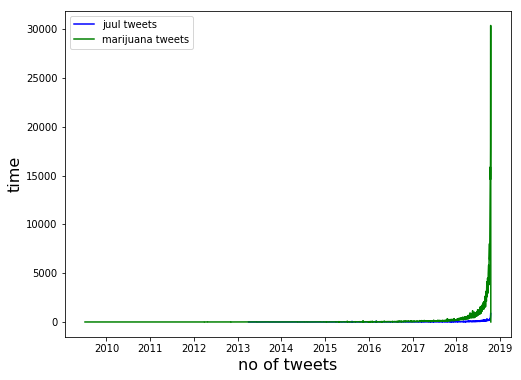

In [274]:
plt.rcParams["figure.figsize"] = (8,6)
plt.plot(list(juul_dt.index),list(juul_dt['count']),color = 'blue', label='juul tweets')
plt.plot(list(mari_dt.index),list(mari_dt['count']), color = 'green', label = 'marijuana tweets')
plt.ylabel("no of tweets",fontsize=16)
plt.xlabel("time", fontsize = 16)
plt.legend()
plt.show() 

In [318]:
## calculating with increase of user
juul_dt_u =  df_juul.groupby(df_juul['tweetCreatedAt'].dt.date)['userID'].unique.agg(['count'])
# juul_dt_u = df_juul.groupby("tweetCreatedAt").agg({"userID": pd.Series.nunique})

AttributeError: 'function' object has no attribute 'agg'

In [291]:
mari_dt_u = df_mari.groupby("tweetCreatedAt").agg({"userID": pd.Series.nunique})

In [292]:
juul_dt_u

,userID
tweetCreatedAt,
2013-04-02 04:26:25,1
2013-04-06 01:14:42,1
2013-04-06 03:38:48,1
2013-04-06 03:41:33,1
2013-04-23 06:40:49,1
2013-05-01 14:06:53,1
2013-05-29 23:17:21,1
2013-05-29 23:21:34,1
2013-06-10 06:28:30,1


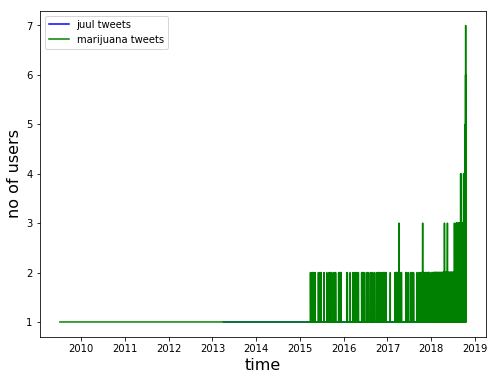

In [317]:
plt.rcParams["figure.figsize"] = (8,6)
plt.plot(list(juul_dt_u.index),list(juul_dt_u['userID']),color = 'blue', label='juul tweets')
plt.plot(list(mari_dt_u.index),list(mari_dt_u['userID']), color = 'green', label = 'marijuana tweets')
plt.ylabel("no of users",fontsize=16)
plt.xlabel("time", fontsize = 16)
plt.legend()
plt.show() 

###### Previous approach

In [304]:
df_juul = df[df['tweetText'].str.contains("juul",case= False)]

In [305]:
df_mari = df[df['tweetText'].str.contains("marijuana",case= False)] 

In [306]:
len(df_juul)

13398

In [307]:
len(df_mari)

3987

In [308]:
# datetime_object = datetime.strptime(df_mari.tweetCreatedAt.iloc[0], '%Y-%m-%d %H:%M:%S')

In [309]:
# ts = time.time()
# datetime.fromtimestamp(ts).strftime('%Y-%m-%d %H:%M:%S')

In [310]:
# changing to datetime objects
df_mari['tweetCreatedAt'] = pd.to_datetime(df_mari.tweetCreatedAt)

In [311]:
df_juul['tweetCreatedAt'] = pd.to_datetime(df_juul.tweetCreatedAt)

In [312]:
juul_dt =  df_juul.groupby(df_juul['tweetCreatedAt'].dt.date)['tweetCreatedAt'].agg(['count'])

In [313]:
mari_dt =  df_mari.groupby(df_mari['tweetCreatedAt'].dt.date)['tweetCreatedAt'].agg(['count'])

In [314]:
len(juul_dt)

830

In [315]:
len(mari_dt)

607

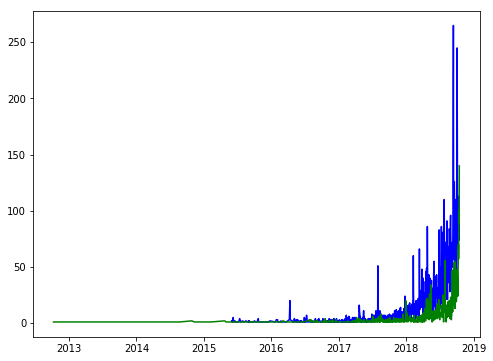

In [316]:
# only "juul" and "marijuana"
plt.plot(list(juul_dt.index),list(juul_dt['count']),color = 'blue', label='juul tweets')
plt.plot(list(mari_dt.index),list(mari_dt['count']), color = 'green', label = 'marijuana tweets')
plt.show() 

In [160]:
### testing

In [ ]:
## check with no of users insatead of tweets-- less data in previous